<a href="https://colab.research.google.com/github/xilipkoru/estrogen-receptor-alpha-qsar/blob/master/Adquisici%C3%B3n_de_datos_de_PubChem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adquisición de datos de PubChem**

---
*Elaboró: Jesús Armando Rufino Valencia*

*Revisó: Fernanda Saldivar Contacto: fer.saldivarg@gmail.com*







# Objetivos


---
+ Familiarizarse con el uso de `PUG-REST` para acceder a información disponible en PubChem mediante programación.  

* Identificar el tipo de información disponible y los diferentes tipos de búsqueda que pueden realizarse, de tal manera que la búsqueda de información se realice en forma sencilla y eficiente.

* Ejemplificar la adquisición de diferente tipo de información en PubChem.

#Introducción

[PubChem](https://pubchem.ncbi.nlm.nih.gov/) es una base de datos de acceso gratuito, creada por la Biblioteca Nacional de Medicina (NLM), un instituto que forma parte de  los Institutos Nacionales de Salud (NIH) de Estados Unidos. PubChem provee información de la mayoría de las moléculas, como nucleótidos, carbohidratos, lípidos, péptidos, macromoléculas químicamente modificadas y moléculas más pequeñas, almacenando datos de sus identificadores, estructuras químicas, propiedades químicas y físicas, actividad biológica, patentes e información toxicológica. La información almacenada por PubChem es recolectada de cientos de fuentes de información, donde se incluyen por dar algunos ejemplos, agencias gubernamentales, vendedores químicos y artículos de investigación.
Actualmente (septiembre 2023), PubChem proporciona más de 115 millones de compuestos con estructuras químicas únicas y más de 308 millones de sustancias, siendo así una de las principales fuentes para la comunidad científica de entidades químicas.  PubChem también nos permite acceder a información ligada a compuestos como bioensayos, bioactividades, genes, proteínas, taxonomías, secuencias y patentes.

 Para acceder a PubChem mediante programación existen dos métodos, usando [PUG-REST](https:////pubchemdocs.ncbi.nlm.nih.gov/pug-rest) y [PUG-View](https://pubchemdocs.ncbi.nlm.nih.gov/pug-view). En este colab utilizaremos [PUG-REST](https:////pubchemdocs.ncbi.nlm.nihgov./pug-rest), una interfaz web que da acceso a los datos y servicios de PubChem.

 El formato implicado para la busqueda en PUG-REST, se divide en tres secciones principales: *Input*, *Operation* y *OutPut*.

En las siguientes figura se explican a detalle las diferentes especificaciones que pueden realizarse en cada una de estas secciones.

Figura 1. Construcción de búsquedas en PubChem

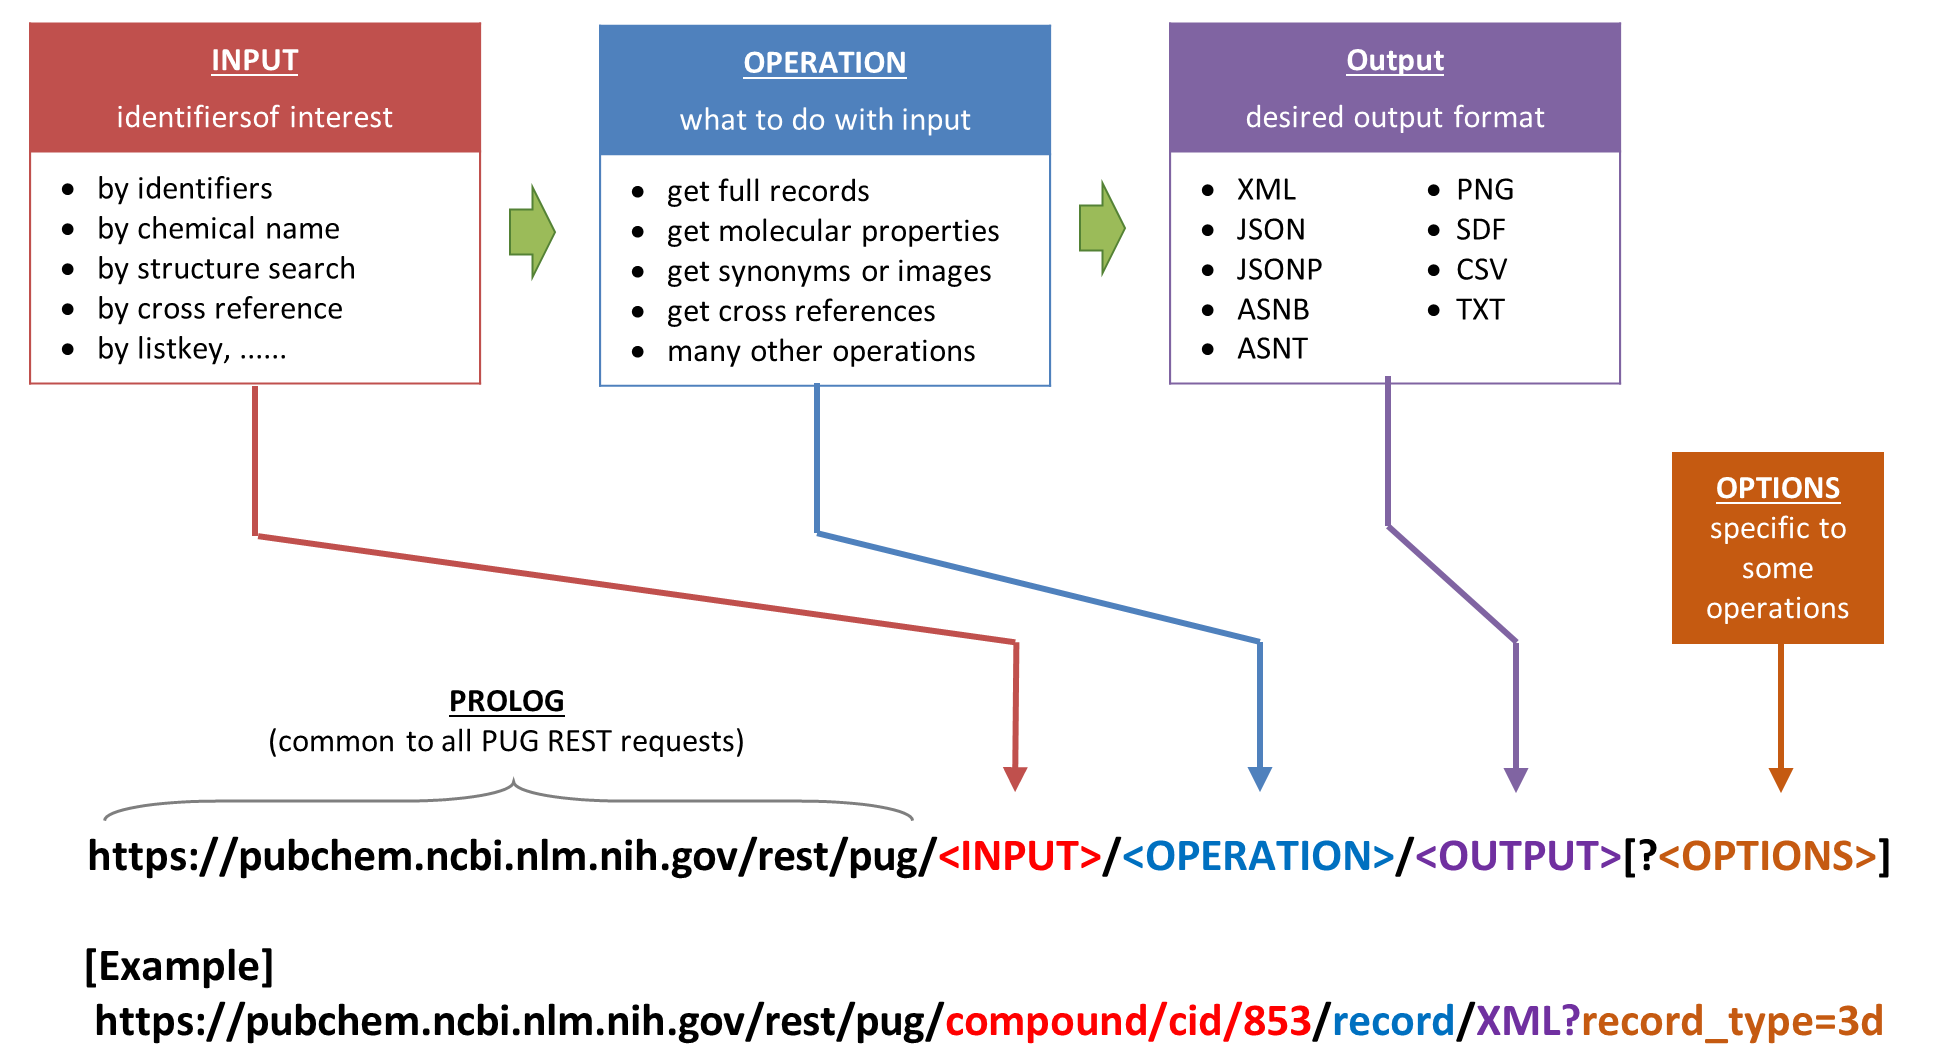

**Para saber más:**

* Sunghwan Kim, Paul A. Thiessen, Evan E. Bolton, Stephen H. Bryant, PUG-SOAP and PUG-REST: web services for programmatic access to chemical information in PubChem, *Nucleic Acids Research*, Volume 43, Issue W1, 1 July 2015, Pages W605–W611, https://doi.org/10.1093/nar/gkv396.

* https://academic.oup.com/nar/article/43/W1/W605/2467896#supplementary-data

* https://academic.oup.com/nar/article/46/W1/W563/4990016


# Ejercicios resueltos

---



In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 21.7 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import Draw

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

import time
from pathlib import Path
from urllib.parse import quote

from IPython.display import Markdown, Image
import requests

import urllib.request

HERE = Path(_dh[-1])
DATA = HERE / "data"

import requests
import io
from rdkit.Chem import Draw



## 1- Obtener CID de un compuesto a partir de su nombre

*1.1* Obtener el CID del ácido shikímico por medio de
su nombre.

In [ ]:
import requests
import urllib.request

# input =  "compund/name/{name}"
# operation =  "cids"
# output =  "JSON" Notación de objetos JavaScript

name = "Shikimic Acid"

url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/cids/JSON"

option =  "none"


r = requests.get(url) #Realice una solicitud a una página web (PUG_REST)
r.raise_for_status() #devuelve un objeto HTTPError si se ha producido un error durante el proceso.
response = r.json()
if "IdentifierList" in response:
    cid = response["IdentifierList"]["CID"][0]
else:
    raise ValueError(f"Could not find matches for compound: {name}")
print(f"PubChem CID for {name} is:\n{cid}")


PubChem CID for Shikimic Acid is:
8742


Otra manera de obtener el **CID** para el Ácido Shikímico, es definiendo el dominio de búsqueda que no se altera como *prolog* e ir agregando las especificaciones de búsqueda (INPUT, Operación y OUTPUT).

In [ ]:
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug' #Fijar el dominio de búsqueda que no se altera

name = 'Shikimic Acid'
url = prolog + "/compound/name/"+ name + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("PubChem CID for Shikimic Acid is:", cids)
#print(cids)

PubChem CID for Shikimic Acid is: ['8742']


1.2 Obtener el SMILES del ácido skikímico por medio de su CID

In [ ]:
# input =  "/compound/cid/{cid}"
# operation =  "property/CanonicalSMILES/"
# output =  "JSON"

In [ ]:
cid = "8742"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/JSON"
r = requests.get(url)
r.raise_for_status()
response = r.json()

if "PropertyTable" in response:
    canonical_SMILES = response["PropertyTable"]["Properties"][0]["CanonicalSMILES"]
else:
    raise ValueError(f"Could not find matches for PubChem CID: {cid}")
print(f"Canonical SMILES for {name} is:\n{canonical_SMILES}")

Canonical SMILES for Shikimic Acid is:
C1C(C(C(C=C1C(=O)O)O)O)O


##2- Obtener CID de un compuesto a partir de su estructura

2.1 Obtener el CID del ácido shikímico por medio de su SMILES

In [ ]:
# input = "/compound/smiles/C1C(C(C(C=C1C(=O)O)O)O)O"
# operation = '/cids/'
# output = "txt"

In [ ]:
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
url = prolog + "/compound/smiles/" + "C1C(C(C(C=C1C(=O)O)O)O)O" + "/cids/TXT"
res = requests.get(url)
cids = res.text.split()
print("PubChem CID for Shikimic Acid is:", cids)

PubChem CID for Shikimic Acid is: ['1094']


##3- Obtener número de CIDs de una fórmula molecular

3.1 Obtener el número de CIDs de una misma fórmula molecular (C7H10O5, fórmula molecular del ácido shikímico).


In [ ]:
# input = '/compound/fastformula/C7H10O5'
# operation = '/cids/'
# output = "txt"

In [ ]:
query = 'C7H10O5'    # Molecular formula for Crestor (Rosuvastatin: CID 446157)
url = prolog + "/compound/fastformula/"+ query + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)


# Number of CIDs: 1377


Es posible permitir a otros elementos estar presentes al agregarlos a la fórmula especificada, como se muestra a continuación

In [ ]:
url = prolog + "/compound/fastformula/"+ query + "/cids/txt?AllowOtherElements=true"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)


# Number of CIDs: 3314


##4- Obtener estructura 2D de un compuesto químico

4.1 Obtener la estructura 2D del ácido shikímico por medio de su CID

In [ ]:
# input =  "/compound/cid/{cid}/"
# output =  "PNG"

The 2D structure of Shikimic Acid:

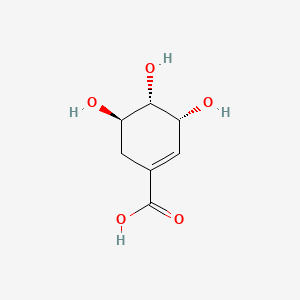

In [ ]:
cid = "8742"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/PNG"

r = requests.get(url)
r.raise_for_status()

display(Markdown("The 2D structure of Shikimic Acid:"))
display(Image(r.content))

##5- Obtener propiedades a partir de CID

5.1 Obtener el peso molecular para el ácido shikímico por medio de su CID

In [ ]:
# input =  "/compound/cid/{cid}"
# operation =  "property/MolecularWeight/"
# output =  "JSON"

In [ ]:
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/MolecularWeight/JSON"

r = requests.get(url)
r.raise_for_status()
response = r.json()

if "PropertyTable" in response:
    mol_weight = response["PropertyTable"]["Properties"][0]["MolecularWeight"]
else:
    raise ValueError(f"Could not find matches for PubChem CID: {cid}")
print(f"Molecular weight for {name} is:\n{mol_weight}")

Molecular weight for Shikimic Acid is:
174.15


##6- Obtener varias propiedades moleculares de un mismo CID

6.1 Obtener las propiedades de fórmula molecular, peso molecular y XLogP para el pentano, hexano y heptano, por medio de sus CIDs.
Los CIDS son 8003,8058 y  8900 respectivamente.

In [ ]:
# input = '/compound/cid/8003,8058,8900'
# operation = '/property/MolecularFormula,MolecularWeight,XLogP'
# output = '/CSV'

In [ ]:
# Definir variables para realizar una solicitud PUG-REST.
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
input = '/compound/cid/8003,8058,8900'
operation = '/property/MolecularFormula,MolecularWeight,XLogP'
output = '/CSV'

# Formular la URL de solicitud PUG-REST
url = prolog + input + operation + output
df1=pd.read_csv(url)

# Imprimir resultado.
df1

,CID,MolecularFormula,MolecularWeight,XLogP
0,8003,C5H12,72.15,3.4
1,8058,C6H14,86.18,3.9
2,8900,C7H16,100.20,4.4


Otra manera de obtener las propiedades de fórmula molecular, peso molecular y XLogP para el pentano, hexano y heptano es:

In [ ]:
df=pd.read_csv("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/8003,8058,8900/property/MolecularFormula,MolecularWeight,XlogP/CSV", delimiter=",")
df

,CID,MolecularFormula,MolecularWeight,XLogP
0,8003,C5H12,72.15,3.4
1,8058,C6H14,86.18,3.9
2,8900,C7H16,100.20,4.4


##7- Obtener distintos identificadores químicos y mostrar diferencias en los mismos.

Para una misma fórmula química es posible obtener distintos compuestos, ya sea por su conectividad (isómeros constitucionales) o por el arreglo de los átomos en el espacio (estereoisómeros), en la Figura 2, se muestra un poco más a detalle la clasificación de isómeros.

Es importante tener presente esta información, porque para una estructura se pueden dar varios ids, porque se contemplan los isomeros...



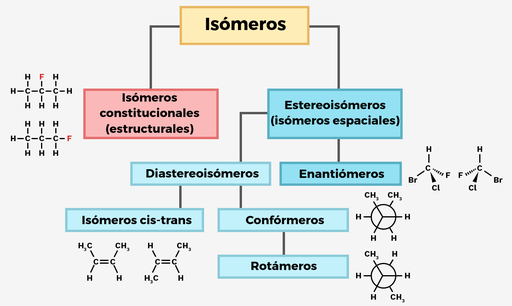

7.1 Obtener los identificadores del ácido shikímico

In [ ]:
# input = '/compound/fastidentity/smiles/'
# operation = 'property/isomericsmiles/ ?identity_type=' + myoption
# output = 'CSV'

#### Identity_type: same_stereo_isotope
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"


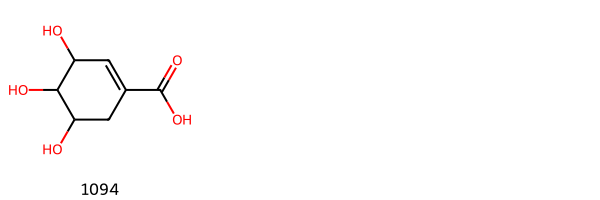

#### Identity_type: same_stereo
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"


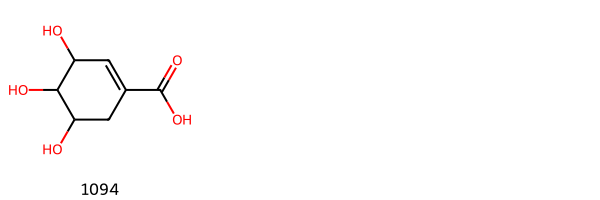

#### Identity_type: same_isotope
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"
8742 "C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
7076075 "C1[C@@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
10986763 "C1[C@@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
11332752 "C1[C@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
11789701 "C1[C@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
12315498 "C1[C@H](C([C@@H](C=C1C(=O)O)O)O)O"
12315501 "C1[C@@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
16758061 "C1C([C@@H](C(C=C1C(=O)O)O)O)O"
21626190 "C1[C@@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
24202011 "C1[C@@H](C(C(C=C1C(=O)O)O)O)O"
40970370 "C1[C@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
42626655 "C1[C@H]([C@@H](C(C=C1C(=O)O)O)O)O"
49867941 "C1[C@H](C(C(C=C1C(=O)O)O)O)O"
59081897 "C1C([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
69027491 "C1C(C([C@@H](C=C1C(=O)O)O)O)O"


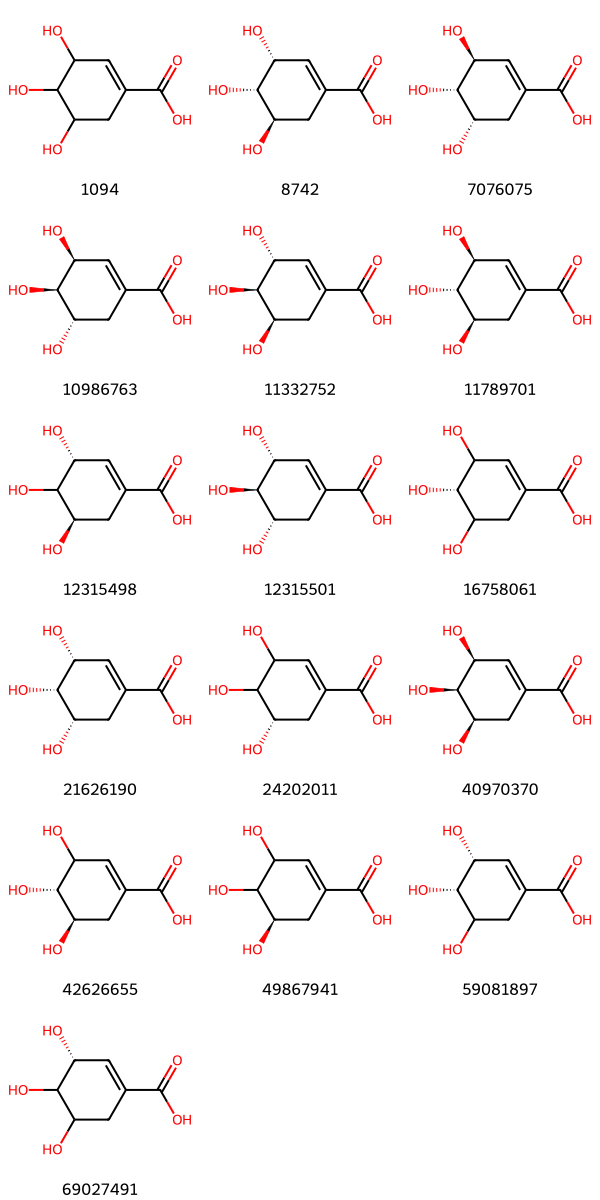

#### Identity_type: same_connectivity
1094 "C1C(C(C(C=C1C(=O)O)O)O)O"
8742 "C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
7076075 "C1[C@@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
9989730 "[H][C@@]1([C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O)[2H]"
10103663 "[2H][C@@]1(CC(=C[C@H]([C@H]1O)O)C(=O)O)O"
10986763 "C1[C@@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
11332752 "C1[C@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
11789701 "C1[C@H]([C@@H]([C@H](C=C1C(=O)O)O)O)O"
12315498 "C1[C@H](C([C@@H](C=C1C(=O)O)O)O)O"
12315501 "C1[C@@H]([C@H]([C@@H](C=C1C(=O)O)O)O)O"
16758061 "C1C([C@@H](C(C=C1C(=O)O)O)O)O"
21626190 "C1[C@@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
24202011 "C1[C@@H](C(C(C=C1C(=O)O)O)O)O"
25239957 "[2H]C1[C@H]([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
40970370 "C1[C@H]([C@H]([C@H](C=C1C(=O)O)O)O)O"
42626655 "C1[C@H]([C@@H](C(C=C1C(=O)O)O)O)O"
49867941 "C1[C@H](C(C(C=C1C(=O)O)O)O)O"
59081897 "C1C([C@@H]([C@@H](C=C1C(=O)O)O)O)O"
59869331 "[2H][C@@]1([C@@H](CC(=C[C@H]1O)C(=O)O)O)O"
59869332 "[2H][C@]1(C=C(C[C@H]([C@@H]1O)O)C(=O)O)O"
59869334

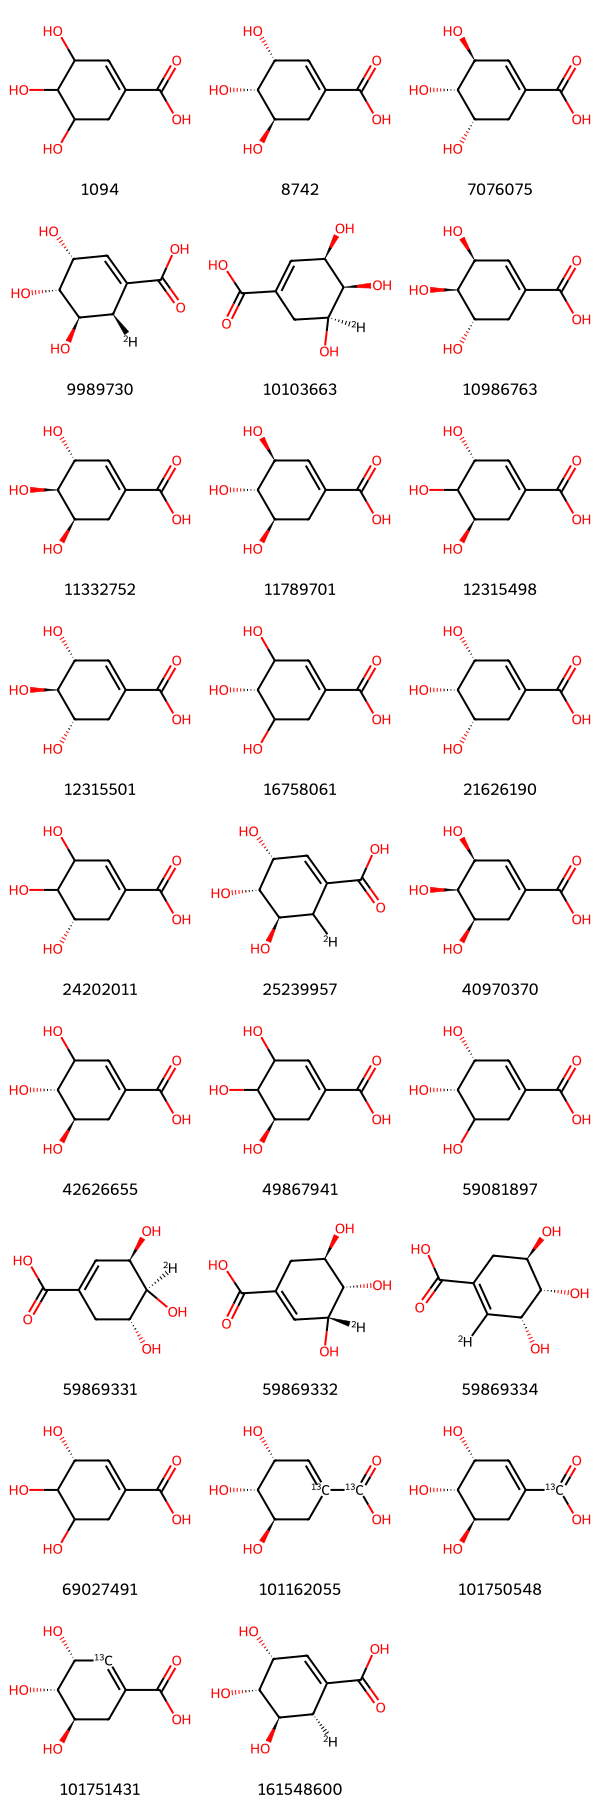

In [ ]:

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

mydata = { 'smiles' : "C1C(C(C(C=C1C(=O)O)O)O)O" }
options = [ 'same_stereo_isotope', # This is the default
            'same_stereo',
            'same_isotope',
            'same_connectivity']

for myoption in ( options ) :

    print("#### Identity_type:", myoption)

    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + myoption
    res = requests.post(url, data=mydata)

    mycids = []
    mysmiles = []

    file = io.StringIO(res.text)
    file.readline()               # Skip the first line (column heads)

    for line in file :

        ( cid_tmp, smiles_tmp ) = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)

        mycids.append( cid_tmp )
        mysmiles.append( smiles_tmp.replace('"',"") )

    mols = []

    for x in mysmiles :

        mol = Chem.MolFromSmiles(x)
        Chem.FindPotentialStereoBonds(mol)    # Identify potential stereo bonds!
        mols.append(mol)

    img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=mycids)
    display(img)

    time.sleep(0.2)

##8- Obtener ensayos a través de CIDs y AIDs

8.1 Obtener un resumen de los ensayos para el ácido shikímico

In [ ]:
# input = '/compound/cid/8742/'
# operation = 'assaysummary'
# output = '/CSV'

In [ ]:
df2=pd.read_csv("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/8742/assaysummary/CSV")
df2

,AID,Panel Member ID,SID,CID,Activity Outcome,Target GI,Target GeneID,Activity Value [uM],Activity Name,Assay Name,Assay Type,PubMed ID,RNAi
0,608,NaN,11537762,8742,Inactive,1.714984e+07,2280.0,NaN,NaN,NMR Based Screening Assay for FKBP12,Other,NaN,NaN
1,811,NaN,26528894,8742,Inactive,5.566203e+07,NaN,NaN,NaN,Primary Cell Based High Throughput Screening A...,Screening,NaN,NaN
2,833,NaN,26528894,8742,Inactive,2.578455e+06,29234.0,NaN,NaN,Primary Cell Based High Throughput Screening A...,Screening,NaN,NaN
3,875,NaN,26754400,8742,Inactive,1.390365e+09,NaN,NaN,Potency,qHTS Assay for Inhibitors of BRCT-Phosphoprote...,Confirmatory,NaN,NaN
4,880,NaN,26754400,8742,Inactive,3.290016e+06,6002.0,NaN,NaN,qHTS Assay for Inhibitors of RGS12 GoLoco Moti...,Confirmatory,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,1671463,NaN,93576745,8742,Inactive,NaN,NaN,NaN,NaN,High-throughput screening primary assay to ide...,Screening,NaN,NaN
473,1671498,NaN,103206753,8742,Unspecified,NaN,NaN,19.9526,IC50,Antiviral activity determined as inhibition of...,Confirmatory,NaN,NaN
474,1671498,NaN,103206753,8742,Unspecified,NaN,NaN,20.0000,IC50,Antiviral activity determined as inhibition of...,Confirmatory,NaN,NaN
475,1745845,NaN,93576745,8742,Inactive,NaN,6311.0,NaN,Potency,Primary qHTS for Inhibitors of ATXN expression,Confirmatory,35787375.0,NaN


8.2 Obtener compuestos probados en el ensayo con ID 608  https://pubchem.ncbi.nlm.nih.gov/bioassay/608

In [ ]:
# input = '/assay/aid/608'
# operation = 'assaysummary'
# output = '/CSV'

In [ ]:
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/608//csv"
df3=pd.read_csv(url)
print("Url del ensayo consultado:", url)
df3

Url del ensayo consultado: https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/608//csv


,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Kd
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dissociation Constant
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR
3,1,26679181.0,16725057.0,COC1=CC(=CC(=C1OC)OC)C(=O)C(=O)N2CCCC[C@H]2C(=...,Active,80.0,http://sdccg.burnham.org,NaN,3
4,2,26679182.0,16725058.0,CC(C)C1=CC=C(C=C1)SCC(=O)O,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
...,...,...,...,...,...,...,...,...,...
3817,3815,11535282.0,1246707.0,CC1=CC(=CS1)C(=O)NC2=CC3=C(C=C2)OCO3,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3818,3816,11535283.0,1246960.0,CC1=CC(=CS1)C(=O)NCC2=CN=CC=C2,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3819,3817,11535284.0,1247116.0,CC1=C(C(=NO1)C)C(=O)NC2=CC=CC=C2SC,Inactive,0.0,http://sdccg.burnham.org,NaN,4001
3820,3818,11535285.0,1247253.0,CC1=C(SC(=C1C#N)NC(=O)C2=C(ON=C2C)C)C,Inactive,0.0,http://sdccg.burnham.org,NaN,4001


##9- Ejercicio similitud

Actualmente PubChem utiliza para la similitud 2D el [coeficiente de Tanimoto](https://pubchemdocs.ncbi.nlm.nih.gov/about#tanimoto), mientras que para la similitud 3D el método esta basado en [*“atom-centered Gaussian-shape comparison method”*](https://onlinelibrary.wiley.com/doi/abs/10.1002/%28SICI%291096-987X%2819961115%2917%3A14%3C1653%3A%3AAID-JCC7%3E3.0.CO%3B2-K).

Si usted desea saber más sobre similitud química, puede consultar [aquí](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics_OLCC_(2019)/04%3A_Searching_Databases_for_Chemical_Information/4.04%3A_Searching_PubChem_Using_a_Non-Textual_Query)

In [ ]:
from urllib.parse import quote
import requests

La estructura del acido shikimico es:


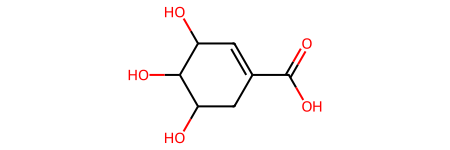

In [ ]:
query = "C1C(C(C(C=C1C(=O)O)O)O)O"
print("La estructura del acido shikimico es:")
Chem.MolFromSmiles(query)

In [ ]:
def query_pubchem_for_similar_compounds(smiles, threshold=75, n_records=10):
    escaped_smiles = quote(smiles).replace("/", ".")
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/similarity/smiles/{escaped_smiles}/JSON?threshold={threshold}&MaxRecords={n_records}"
    r = requests.get(url)
    r.raise_for_status()
    key = r.json()["Waiting"]["ListKey"]
    return key

In [ ]:
job_key = query_pubchem_for_similar_compounds(query)

In [ ]:
def check_and_download(key, attempts=30):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/{key}/cids/JSON"
    print(f"Querying for job {key} at URL {url}...", end="")
    while attempts:
        r = requests.get(url)
        r.raise_for_status()
        response = r.json()
        if "IdentifierList" in response:
            cids = response["IdentifierList"]["CID"]
            break
        attempts -= 1
        print(".", end="")
        time.sleep(10)
    else:
        raise ValueError(f"Could not find matches for job key: {key}")
    return cids

In [ ]:
similar_cids = check_and_download(job_key)

Querying for job 601502420924657869 at URL https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/listkey/601502420924657869/cids/JSON...

In [ ]:
def smiles_from_pubchem_cids(cids):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{','.join(map(str, cids))}/property/CanonicalSMILES/JSON"
    r = requests.get(url)
    r.raise_for_status()
    return [item["CanonicalSMILES"] for item in r.json()["PropertyTable"]["Properties"]]

In [ ]:
similar_smiles = smiles_from_pubchem_cids(similar_cids)

In [ ]:
query_results_df = pd.DataFrame({"smiles": similar_smiles, "CIDs": similar_cids})
PandasTools.AddMoleculeColumnToFrame(query_results_df, smilesCol="smiles")
query_results_df.head(5)

,smiles,CIDs,ROMol
0,C1C(C(C(C=C1C(=O)O)O)O)O,8742,<rdkit.Chem.rdchem.Mol object at 0x7c3cb7c5b4c0>
1,C1C(C(C(=O)C=C1C(=O)O)O)O,439774,<rdkit.Chem.rdchem.Mol object at 0x7c3cb7c5b7d0>
2,C1C(C(C(C=C1C(=O)O)OP(=O)(O)O)O)O,121947,<rdkit.Chem.rdchem.Mol object at 0x7c3cb7c5b530>
3,C1C(C(C(C=C1C(=O)O)O)O)O,1094,<rdkit.Chem.rdchem.Mol object at 0x7c3cb7c5b760>
4,C1C(C(C(C=C1C(=O)[O-])O)O)O,7057976,<rdkit.Chem.rdchem.Mol object at 0x7c3cb7c5b5a0>


In [ ]:
def multi_preview_smiles(query_smiles, query_name, similar_molecules_pd):
    legends = [f"PubChem CID: {str(s)}" for s in similar_molecules_pd["CIDs"].tolist()]
    molecules = [Chem.MolFromSmiles(s) for s in similar_molecules_pd["smiles"]]
    query_smiles = Chem.MolFromSmiles(query_smiles)
    return MolsToGridImage(
        [query_smiles] + molecules,
        molsPerRow=3,
        subImgSize=(300, 300),
        maxMols=len(molecules),
        legends=([query_name] + legends),
        useSVG=True,
    )

The results of querying similar compounds for Shikimic Acid:


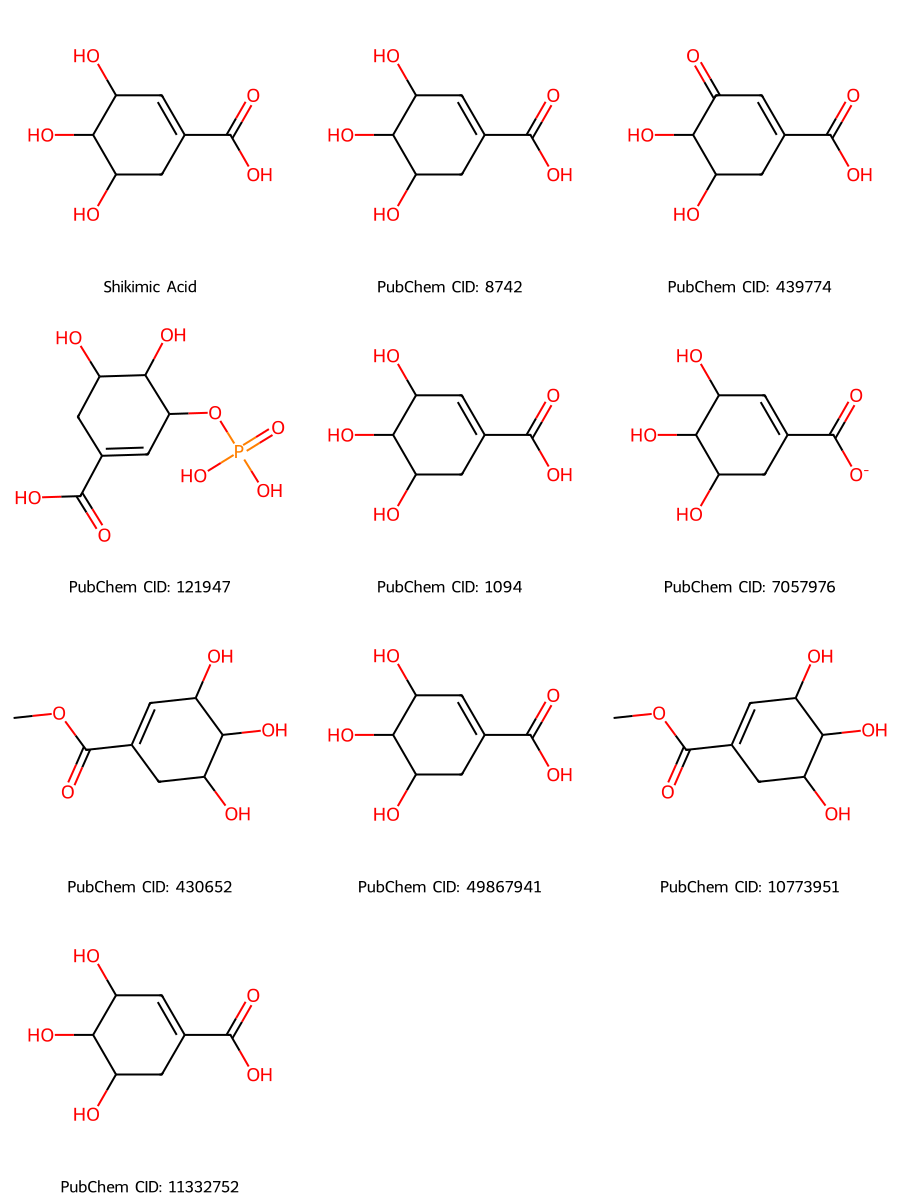

In [ ]:
print("The results of querying similar compounds for Shikimic Acid:")
multi_preview_smiles(query, "Shikimic Acid", query_results_df)

##10- Obtener compuestos con similitud en 2D a partir de SMILES

10.1 Obtener CIDs de compuestos con similitud del 99% en 2D para la molécula del ácido shikímico por medio de su smile

In [ ]:
# input = '/compound/fastsimilarity_2d/smiles/'
# operation = 'cids/ ?Theshold=99'
# output = 'txt'

In [ ]:
mydata = { 'smiles' : "C1C(C(C(C=C1C(=O)O)O)O)O" }
#donde mydata sera el smiles del cual queremos encontrar compuestos similares
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99"
res = requests.post(url,data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))

print(cids)


# Number of CIDs: 32
['8742', '1094', '7057976', '49867941', '11332752', '10986763', '40970370', '12315498', '11789701', '69027491', '59869334', '59869332', '59869331', '59081897', '42626655', '25239957', '21872888', '21626190', '16758061', '9989730', '7076075', '7076074', '10103663', '12315501', '24202011', '40467898', '40467899', '40467900', '101162055', '101750548', '101751431', '161548600']


Nota: Para el paramento "Threshold", el cual es usado para el % de similitud, este distingue entre mayúsculas y minúsculas. Si se usa "threshold" es usado en cambio de "Threshold", este será ignorado y el valor por defecto será de 0.90


10.2 Elaborar un ejercicio donde se compara una misma búsqueda con 95% pero con la diferencia de "Threshold" y "thresold"

In [ ]:
url1 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=95"
url2 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?threshold=95"  # "threshold=95" es ignorado.
res1 = requests.post(url1,data=mydata)
res2 = requests.post(url2,data=mydata)
cids1 = res1.text.split()
cids2 = res2.text.split()
print("# Number of CIDs:", len(cids1), "vs.", len(cids2))


# Number of CIDs: 59 vs. 167


##11- Obtener número de CIDs que se den por "substructure" de un compuesto a partir del SMILES

La conformación de una estructura química grande puede separarse en pequeñas estructuras, estas pequeñas partes se les denomina subestructuras de la estructura química inicial. Por otra parte, la estructura química grande es considerada una superestructura de las estructuras más pequeñas ( independientemente si se tienen las demás subestructuras que lo componen.)
Un ejemplo sería con el ácido shikímico, donde para la estructura del CID 16129778 el ác. shíkimico sería una subestructura de este, por otra parte, el ác. shikímico es una superestructura del CID 153767140.


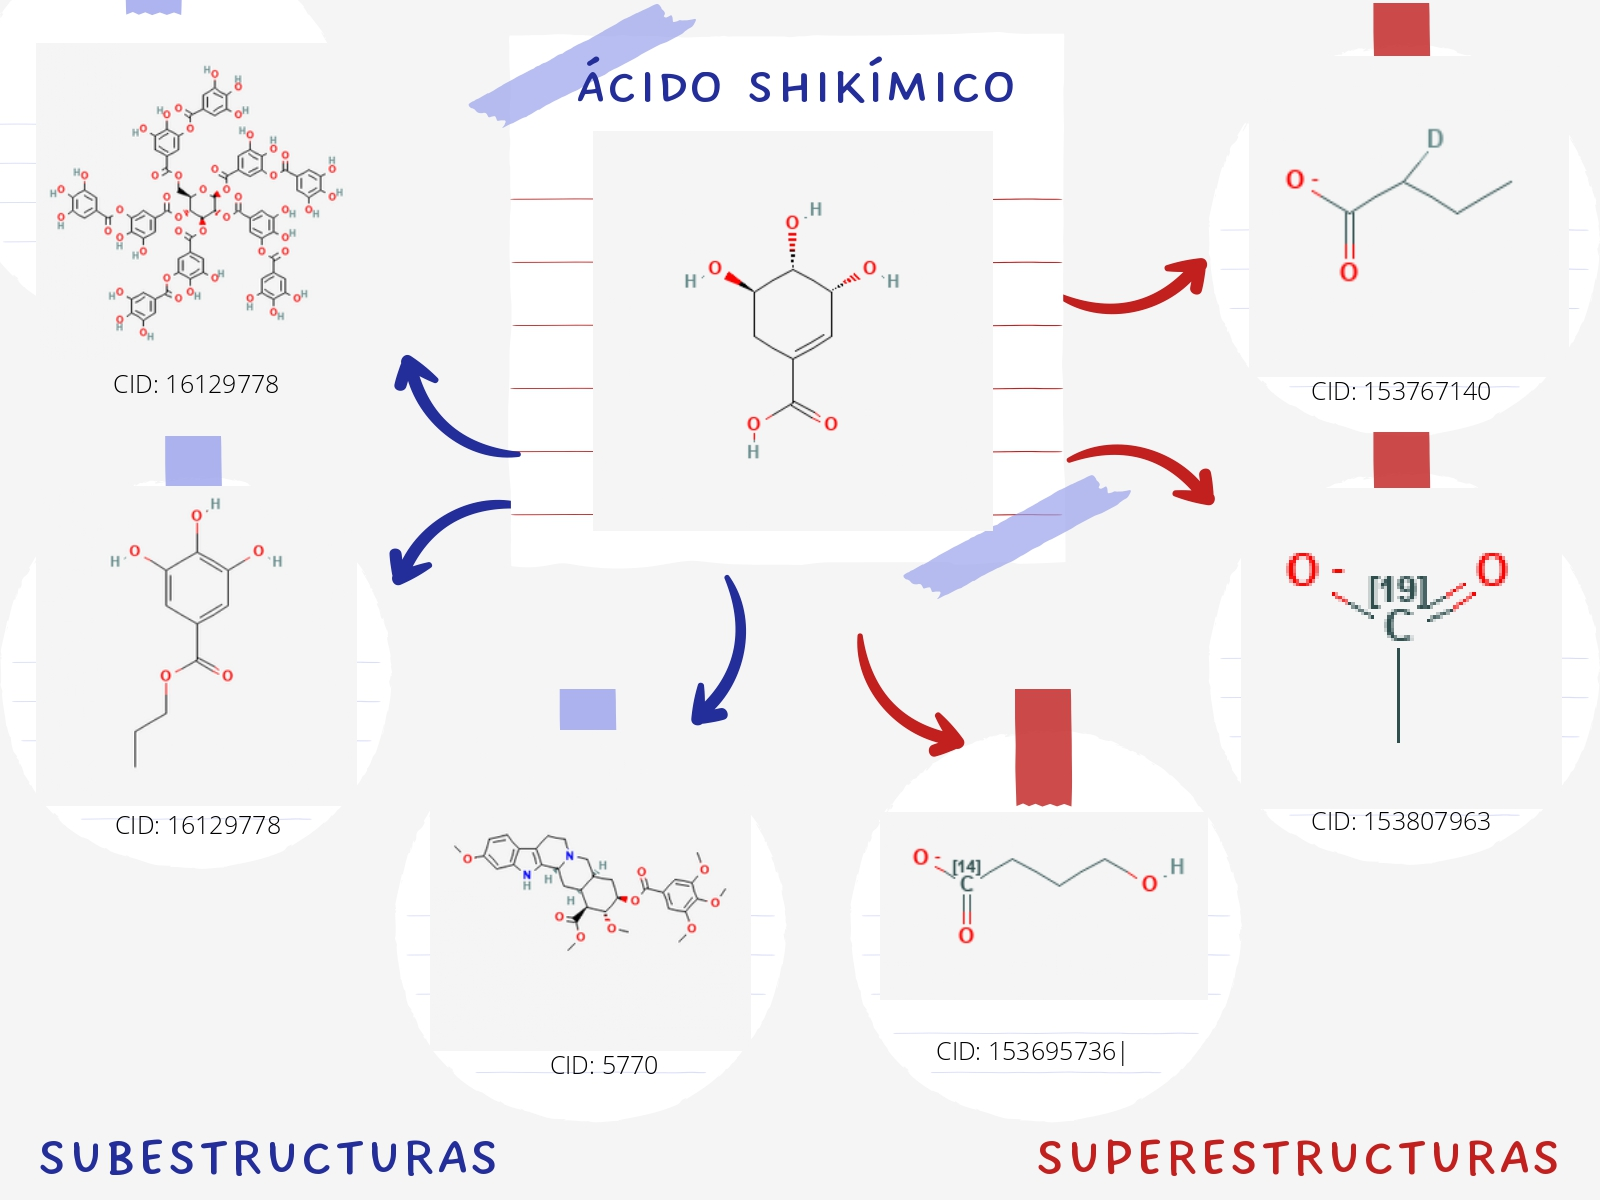

Obtener para el ácido shikímico por medio de su SMILES, el número de CIDs que posee en subestructura y superstructura.

In [ ]:
# input = '/compound/fastsubstructure/smiles/'
# operation = 'cids/'
# output = 'txt?Stereo=exact'

In [ ]:
query = 'C1C(C(C(C=C1C(=O)O)O)O)O'
mydata = { 'smiles' : query }
url = prolog + "/compound/fastsubstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 36131


'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsubstructure/smiles/cids/txt?Stereo=exact'

In [ ]:
# input = '/compound/fastsuperstructure/smiles/'
# operation = 'cids/'
# output = 'txt?Stereo=exact'

In [ ]:
query = 'C1C(C(C(C=C1C(=O)O)O)O)O'
mydata = { 'smiles' : query }
url = prolog + "/compound/fastsuperstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
#print(cids)

# Number of CIDs: 2390


#Referencias

Searching Databases for Chemical Information. (2022). https://chem.libretexts.org/@go/page/148387

Searching PubChem Using a Non-Textual Query. (2022). https://chem.libretexts.org/@go/page/170162

Python Assignments. (2022). https://chem.libretexts.org/@go/page/170165

Programming Topics. (2022). https://chem.libretexts.org/@go/page/170560



National Center for Biotechnology Information (2022). *PubChem Compound Summary for CID 8742, Shikimic acid*. Consultado Julio 21, 2022 de https://pubchem.ncbi.nlm.nih.gov/compound/8742#section=Canonical-SMILES.

National Center for Biotechnology Information (2022). *PUG REST*. Consultado Julio 21, 2022 de https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest-tutorial

Sunghwan Kim, Paul A. Thiessen, Evan E. Bolton, Stephen H. Bryant, PUG-SOAP and PUG-REST: web services for programmatic access to chemical information in PubChem, Nucleic Acids Research, Volume 43, Issue W1, 1 July 2015, Paginas W605–W611, https://doi.org/10.1093/nar/gkv396.


Sunghwan Kim, Paul A Thiessen, Tiejun Cheng, Bo Yu, Evan E Bolton, An update on PUG-REST: RESTful interface for programmatic access to PubChem, Nucleic Acids Research, Volume 46, Issue W1, 2 July 2018, Paginas W563–W570, https://doi.org/10.1093/nar/gky294